# Imports

In [1]:
import numpy as np
import sympy
import matplotlib.pyplot as plt

# Constants

### Geometric Constants

In [2]:
E = 26.2 * 10**9                # elastic modulus of aluminum (Pa)
rho = 2700                      # density of aluminum (kg/m^3)
l = 34 / 39.37                  # length of bat (m) 
r = 1.25 / 39.37                # radius of baseball bat (m)
m = rho * l * np.pi * r**2      # mass of bat (kg)
F = 18000                       # force of ball on bat (N)

### Wave Constants

In [3]:
k = E * (np.pi * r**2) / l               # spring constant (N/m)
period = 2 * np.pi * (m / k)**(1/2)      # period (s)
c = (E / rho)**(1/2)                     # wave speed (m/s)
lamb = c / (1/period)                    # wavelength (m)

In [4]:
amplitude = F / k                        # amplitude (ie: initial deformation) (m)
waveNumber = 2 * np.pi / lamb            # wave number
omega = 2 * np.pi * (1 / period)         # angular frequency

In [5]:
print("c =", c)

print("amplitude =", amplitude)
print("waveNumber =", waveNumber)
print("omega =", omega)

c = 3115.0768375280413
amplitude = 0.00018734652712212944
waveNumber = 1.157941176470588
omega = 3607.0757380434993


### Approximation Constants

In [6]:
T1 = 0                     
T2 = 0.01
a = 0
b = l
n = 500

# Estimation Functions

In [7]:
def u_e(x, t):
    """
    Returns the exact solution of the wave function 
    """
    amplitude = F / k                        # amplitude (ie: initial deformation) (m)
    waveNumber = 2 * np.pi / lamb            # wave number
    omega = 2 * np.pi * (1 / period)         # angular frequency
    
    # return amplitude * np.sin(waveNumber*x)
    return amplitude * np.sin(waveNumber*x - omega*t)
    # return np.sin(x*t)

In [8]:
def A_matrix(a, b, n):
    """
    Returns the A matrix
    """
    x = np.linspace(a, b, n+1)
    dx = x[1] - x[0]

    A = (c / dx)**2 * (np.eye(n-1, k=-1) - 2*np.eye(n-1) + np.eye(n-1, k=1))
    return A

In [9]:
def ivp_trap(a, b, T1, T2, n, u_0):
    """
    Returns the approximated solution matrix using the trapezoid method
    """
    A = A_matrix(a, b, n)
    t = np.linspace(T1, T2, n+1)
    dt = t[1] - t[0]

    u = np.zeros([len(t), len(u_0)])
    for i in range(len(t)):
        if i == 0:
            u[0] = u_0
        if i > 0:
            denom = np.eye(A.shape[0]) - 0.5 * dt * A
            numer = u[i-1] + 0.5*dt*A@u[i-1]
            u[i] = np.linalg.solve(denom, numer)
    return u

In [10]:
# def f_true(u, t):
#     """
#     Returns the true function 
#     """
#     deriv = np.zeros_like(u)
#     for i in range(1, len(deriv) - 1):
#         deriv[i] = 

# Plotting

In [11]:
# initializing lists
x_list = []
u_list = []
ut_list = []
err_list = []

# filling lists
x = np.linspace(a, b, n+1)[1:n]
t = np.linspace(T1, T2, n+1)[1:n]

u_0 = u_e(0, t)
u  = ivp_trap(a, b, T1, T2, n, u_0)
ut = u_e(x, t)

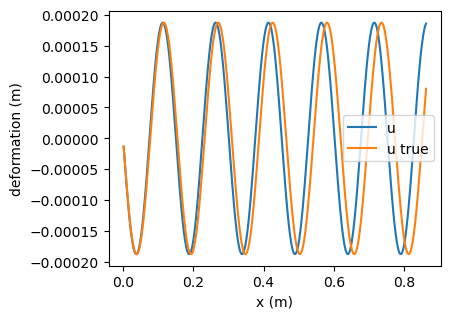

In [12]:
# plots
fig = plt.figure(figsize=(8, 6), tight_layout=True)

ax1 = fig.add_subplot(221)
ax1.plot(x, u[0], label = "u")
ax1.plot(x, ut, label = "u true")
plt.xlabel("x (m)")
plt.ylabel("deformation (m)")
plt.legend()